In [2]:
import numpy as np
from python_speech_features import mfcc
import librosa
import scipy.io.wavfile as wav
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import pandas as pd
from sklearn import svm
from random import *

In [6]:
fgamma = 0.01
fnu = 0.02

while True:
    nor_obs = np.load('train_mfcc20.npy')

    ano_obs = np.load('test_mfcc20.npy')

    nor_obs = pd.DataFrame(nor_obs.real)
    ano_obs = pd.DataFrame(ano_obs.real)

    nor_obs= nor_obs.rename(columns={20: 'Category'})
    ano_obs = ano_obs.rename(columns={20: 'Category'})

    train_feature = nor_obs.sample(n=2553)
#train_feature = nor_obs.loc[0:2562,:]
    train_feature = train_feature.drop('Category',1)
    train_rest = nor_obs.loc[~nor_obs.index.isin(train_feature.index)]
    train_test = train_rest.sample(n=9)
    train_valid = train_rest.loc[~train_rest.index.isin(train_test.index)]

    Y_1 = train_valid['Category']
#Y_1 = nor_obs.loc[2562:, 'Category']
    Y_2 = ano_obs['Category']

    X_test_1 = train_valid.drop('Category',1)
#X_test_1 = nor_obs.loc[2562:,:].drop('Category',1)
    X_test_2 = ano_obs.drop('Category',1)
    X_test = X_test_1.append(X_test_2)


    oneclass = svm.OneClassSVM(kernel = 'rbf',gamma = 'scale', nu=fnu)

    Y_1 = train_valid['Category']
#Y_1 = nor_obs.loc[2562:,'Category']
    Y_2 = ano_obs['Category']
    Y_test = Y_1.append(Y_2)

    oneclass.fit(train_feature)

    fraud_pred = oneclass.predict(X_test_1)

    unique, counts = np.unique(fraud_pred, return_counts = True)

    Y_1 = Y_1.to_frame()
    Y_1 = Y_1.reset_index()
    fraud_pred = pd.DataFrame(fraud_pred)
    fraud_pred = fraud_pred.rename(columns={0:'prediction'})

    TP=FN=FP=TN=0
    for j in range(len(Y_1)):
        if Y_1['Category'][j]==0 and fraud_pred['prediction'][j]==1:
            TP=TP+1
        elif Y_1['Category'][j]==0 and fraud_pred['prediction'][j] == -1:
            FN=FN+1
        elif Y_1['Category'][j]==1 and fraud_pred['prediction'][j]==1:
            FP=FP+1
        else:
            TN=TN+1
    if TP == 300:
        print(fgamma, fnu)
        break
    else:
        fnu-=0.0001
        if fnu <= 0.0001:
            #fgamma-=0.0001
            fnu = 0.02

0.01 0.009600000000000063


In [7]:
X_test_1 = train_test.drop('Category',1)
#X_test_1 = nor_obs.loc[2562:,:].drop('Category',1)
X_test_2 = ano_obs.drop('Category',1)
X_test = X_test_1.append(X_test_2)
Y_1 = train_test['Category']
#Y_1 = nor_obs.loc[2562:,'Category']
Y_2 = ano_obs['Category']
Y_test = Y_1.append(Y_2)
fraud_pred = oneclass.predict(X_test)
unique, counts = np.unique(fraud_pred, return_counts = True)
Y_test = Y_test.to_frame()
Y_test = Y_test.reset_index()
fraud_pred = pd.DataFrame(fraud_pred)
fraud_pred = fraud_pred.rename(columns={0:'prediction'})
TP=FN=FP=TN=0
for j in range(len(Y_test)):
    if Y_test['Category'][j]==0 and fraud_pred['prediction'][j]==1:
        TP=TP+1
    elif Y_test['Category'][j]==0 and fraud_pred['prediction'][j] == -1:
        FN=FN+1
    elif Y_test['Category'][j]==1 and fraud_pred['prediction'][j]==1:
        FP=FP+1
    else:
        TN=TN+1
print(TP, FN, FP, TN)
accuracy = (TP+TN)/(TP+FN+FP+TN)
print (accuracy)
sensitivity = TP/(TP+FN)
print (sensitivity)
specificity = TN/(TN+FP)
print (specificity)
precision = TP/(TP+FP)
print(precision)
F1_score = 2*(precision*sensitivity)/(precision+sensitivity)
print(F1_score)

9 0 0 9
1.0
1.0
1.0
1.0
1.0


In [3]:
fgamma = 0.01
fnu = 0.02
count = 0
accuracy_sum = 0
sensitivity_sum = 0
specificity_sum = 0
precision_sum = 0
F1_score_sum = 0

while True:
    nor_obs = np.load('train_mfcc20.npy')

    ano_obs = np.load('test_mfcc20.npy')

    nor_obs = pd.DataFrame(nor_obs.real)
    ano_obs = pd.DataFrame(ano_obs.real)

    nor_obs= nor_obs.rename(columns={20: 'Category'})
    ano_obs = ano_obs.rename(columns={20: 'Category'})

    train_feature = nor_obs.sample(n=2553)
#train_feature = nor_obs.loc[0:2562,:]
    train_feature = train_feature.drop('Category',1)
    train_rest = nor_obs.loc[~nor_obs.index.isin(train_feature.index)]
    train_test = train_rest.sample(n=9)
    train_valid = train_rest.loc[~train_rest.index.isin(train_test.index)]

    Y_1 = train_valid['Category']
#Y_1 = nor_obs.loc[2562:, 'Category']
    Y_2 = ano_obs['Category']

    X_test_1 = train_valid.drop('Category',1)
#X_test_1 = nor_obs.loc[2562:,:].drop('Category',1)
    X_test_2 = ano_obs.drop('Category',1)
    X_test = X_test_1.append(X_test_2)


    oneclass = svm.OneClassSVM(kernel = 'rbf', gamma=fgamma, nu=fnu)

    Y_1 = train_valid['Category']
#Y_1 = nor_obs.loc[2562:,'Category']
    Y_2 = ano_obs['Category']
    Y_test = Y_1.append(Y_2)

    oneclass.fit(train_feature)

    fraud_pred = oneclass.predict(X_test_1)

    #unique, counts = np.unique(fraud_pred, return_counts = True)

    Y_1 = Y_1.to_frame()
    Y_1 = Y_1.reset_index()
    fraud_pred = pd.DataFrame(fraud_pred)
    fraud_pred = fraud_pred.rename(columns={0:'prediction'})

    TP=FN=FP=TN=0
    for j in range(len(Y_1)):
        if Y_1['Category'][j]==0 and fraud_pred['prediction'][j]==1:
            TP=TP+1
        elif Y_1['Category'][j]==0 and fraud_pred['prediction'][j] == -1:
            FN=FN+1
        elif Y_1['Category'][j]==1 and fraud_pred['prediction'][j]==1:
            FP=FP+1
        else:
            TN=TN+1
    if TP == 300:
        X_test_1 = train_test.drop('Category',1)
        #X_test_1 = nor_obs.loc[2562:,:].drop('Category',1)
        X_test_2 = ano_obs.drop('Category',1)
        X_test = X_test_1.append(X_test_2)
        Y_1 = train_test['Category']
        #Y_1 = nor_obs.loc[2562:,'Category']
        Y_2 = ano_obs['Category']
        Y_test = Y_1.append(Y_2)
        fraud_pred = oneclass.predict(X_test)
        unique, counts = np.unique(fraud_pred, return_counts = True)
        Y_test = Y_test.to_frame()
        Y_test = Y_test.reset_index()
        fraud_pred = pd.DataFrame(fraud_pred)
        fraud_pred = fraud_pred.rename(columns={0:'prediction'})
        TP=FN=FP=TN=0
        for j in range(len(Y_test)):
            if Y_test['Category'][j]==0 and fraud_pred['prediction'][j]==1:
                TP=TP+1
            elif Y_test['Category'][j]==0 and fraud_pred['prediction'][j] == -1:
                FN=FN+1
            elif Y_test['Category'][j]==1 and fraud_pred['prediction'][j]==1:
                FP=FP+1
            else:
                TN=TN+1
        
        accuracy = (TP+TN)/(TP+FN+FP+TN)
        accuracy_sum += accuracy
        sensitivity = TP/(TP+FN)
        sensitivity_sum += sensitivity
        specificity = TN/(TN+FP)
        specificity_sum += specificity

        precision = TP/(TP+FP)
        precision_sum += precision
        F1_score = 2*(precision*sensitivity)/(precision+sensitivity)
        F1_score_sum += F1_score
        count+=1
        fgamma = 0.01
        fnu = 0.02
        if count == 100:
            print(accuracy_sum/100)
            print(sensitivity_sum/100)
            print(specificity_sum/100)
            print(precision_sum/100)
            print(F1_score_sum/100)
            accuracy_22050 = accuracy_sum/100
            sensitivity_22050 = sensitivity_sum/100
            specificity_22050 = specificity_sum/100
            precision_22050 = precision_sum/100
            F1_score_22050 = F1_score_sum/100
            break;
    else:
        fnu-=0.0001
        if fnu <= 0.0001:
            #fgamma-=0.0001
            fnu = 0.02

0.991111111111111
0.982222222222222
1.0
1.0
0.9905882352941174


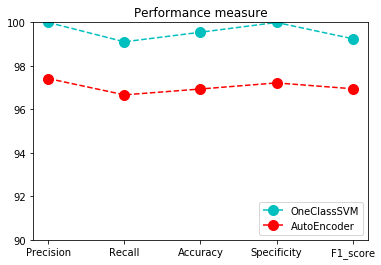

In [4]:
x = ['Precision', 'Recall', 'Accuracy', 'Specificity', 'F1_score']
y = [100,99.11,99.55,100,99.25]
y1 = [97.42,96.67,96.94,97.22,96.95]
plt.plot(x,y, marker="o", ms = 10, ls="--",c="c", label='OneClassSVM')
plt.plot(x,y1, marker="o", ms = 10, ls="--",c="r", label = 'AutoEncoder')
plt.title("Performance measure")
plt.ylim(90,100)
plt.legend(loc='lower right')
plt.show()

In [ ]:
# gamma 값을 구해주는 것

In [4]:
fgamma = 0.1  # gamma 값을 0.3 부터 시작하여 점점 값을 줄여가며 측정해나간다.
fnu = 0.01  # nu 값은 0.01로 고정시킨다.
count = 0
accuracy_sum = 0
sensitivity_sum = 0
specificity_sum = 0
precision_sum = 0
F1_score_sum = 0
alist = []  # TP 값을 계속 저장해 나갈 list
xlist = []  # gamma 값을 저장해 나갈 list

while True:
    nor_obs = np.load('train_mfcc20.npy')

    ano_obs = np.load('test_mfcc20.npy')

    nor_obs = pd.DataFrame(nor_obs.real)
    ano_obs = pd.DataFrame(ano_obs.real)

    nor_obs= nor_obs.rename(columns={20: 'Category'})
    ano_obs = ano_obs.rename(columns={20: 'Category'})

    train_feature = nor_obs.sample(n=2553)
#train_feature = nor_obs.loc[0:2562,:]
    train_feature = train_feature.drop('Category',1)
    train_rest = nor_obs.loc[~nor_obs.index.isin(train_feature.index)]
    train_test = train_rest.sample(n=9)
    train_valid = train_rest.loc[~train_rest.index.isin(train_test.index)]

    Y_1 = train_valid['Category']
#Y_1 = nor_obs.loc[2562:, 'Category']
    Y_2 = ano_obs['Category']

    X_test_1 = train_valid.drop('Category',1)
#X_test_1 = nor_obs.loc[2562:,:].drop('Category',1)
    X_test_2 = ano_obs.drop('Category',1)
    X_test = X_test_1.append(X_test_2)


    oneclass = svm.OneClassSVM(kernel = 'rbf', gamma=fgamma, nu=fnu)

    Y_1 = train_valid['Category']
#Y_1 = nor_obs.loc[2562:,'Category']
    Y_2 = ano_obs['Category']
    Y_test = Y_1.append(Y_2)

    oneclass.fit(train_feature)

    fraud_pred = oneclass.predict(X_test_1)

    #unique, counts = np.unique(fraud_pred, return_counts = True)

    Y_1 = Y_1.to_frame()
    Y_1 = Y_1.reset_index()
    fraud_pred = pd.DataFrame(fraud_pred)
    fraud_pred = fraud_pred.rename(columns={0:'prediction'})

    TP=FN=FP=TN=0
    for j in range(len(Y_1)):
        if Y_1['Category'][j]==0 and fraud_pred['prediction'][j]==1:
            TP=TP+1
        elif Y_1['Category'][j]==0 and fraud_pred['prediction'][j] == -1:
            FN=FN+1
        elif Y_1['Category'][j]==1 and fraud_pred['prediction'][j]==1:
            FP=FP+1
        else:
            TN=TN+1
    if TP == 300:
        print(fgamma)
    alist.append(TP)  # alist에 TP 값을 계속 저장해나간다.
    xlist.append(fgamma) # xlist 에 gamma 값을 계속 저장해나간다.
    fgamma -=0.0002  # 수행 후 gamma 값을 2로 나누어줌
    if fgamma<0.000001:  # gamma 값이 0.000001 보다 작아지면 무한루프를 멈추고 끝낸다.
        break;

KeyboardInterrupt: 

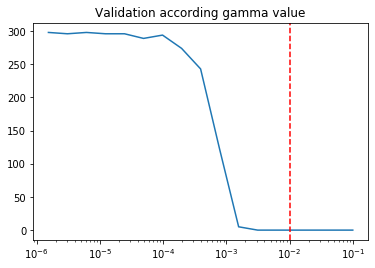

In [3]:
plt.plot(xlist,alist)
plt.title("Validation according gamma value")
plt.axvline(x=0.01,color='r',ls="--")
plt.xscale('log')
plt.show()  # x축을 log스케일로 찍어서 plot을 찍으면 300개를 처음으로 다 맞추는 구간의 gamma값이 10^-2 즉 0.01 이 된다. 때문에 gamma를 0.01로 고정시킨다.

In [ ]:
#ROC커브

In [26]:
from sklearn.metrics import roc_curve, auc


In [33]:
fpr, tpr, thresholds = roc_curve(fraud_pred, Z)
fpr, tpr, thresholds

(array([0., 0., 0., 1.]),
 array([0.        , 0.11111111, 1.        , 1.        ]),
 array([ 1.11682685,  0.11682685,  0.06894449, -1.50288009]))

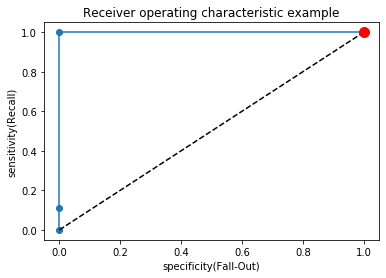

In [34]:
plt.plot(fpr, tpr, 'o-', label="Logistic Regression")
plt.plot([0, 1], [0, 1], 'k--', label="random guess")
plt.plot([specificity], [sensitivity], 'ro', ms=10)
plt.xlabel('specificity(Fall-Out)')
plt.ylabel('sensitivity(Recall)')
plt.title('Receiver operating characteristic example')
plt.show()